In [1]:
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import os
import sys
import json

import numpy as np

sys.path.insert(0, "/home/anonymous/Desktop/eeg_sampling/modeling")
from readbytes import _read8, _read32
from datafilters import apply_dc_filter, apply_dwt_filter

In [3]:
dt_f32 = np.dtype("<f4")

electrodes = [False, False, False, False, False, False, False, False]

In [4]:
#Get data from hardware
fileloc = "./../lib/start_stream.py"
dumploc = "../../modeling"
masterfolder = "testing"
samplefolder = "sample"
sampletime = 2 #sec
sampleid = 0
gatherdata = os.system("python3 " + 
                       fileloc + " " +
                       dumploc + " " +
                       str(sampletime) + " " +
                       masterfolder + " " +
                       samplefolder + " " +
                       str(sampleid))

In [5]:
#Read data from Hardware
testingpath = "./"+ masterfolder + "/" + samplefolder
filename = os.listdir(testingpath)[0]

max_rows = 470

with open(testingpath+"/"+filename, "rb") as readstream:
    magic = _read32(readstream)
    cols = _read32(readstream)
    rows = _read32(readstream)
    buf = readstream.read(max_rows * cols * dt_f32.itemsize)
    data = np.frombuffer(buf, dtype=dt_f32)
    data.shape = (max_rows, cols)

In [6]:
#DC Filter
fs=250
enable_dc = False
dc_lowcut = 3.0
dc_highcut = 30.0
dc_order = 2
dc_type = "bandpass"
dc_func_type = "butter"

#DWT Filter
enable_dwt = False
dwt_type = "db2"
dwt_level = 4
dwt_thresh_func = "soft"
dwt_thresh_type = "rigrsure"

data.flags['WRITEABLE'] = True
for i in range(0,data.shape[1]):
    if enable_dc:
        data[:,i] = apply_dc_filter(data[:,i], fs, dc_lowcut, dc_highcut, dc_order, dc_type, dc_func_type)
    if enable_dwt:
        data[:,i] = apply_dwt_filter(data[:,i], dwt_type, dwt_level, dwt_thresh_func, dwt_thresh_type)

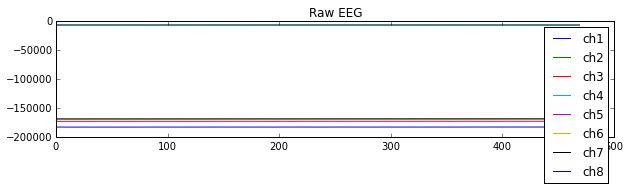

In [7]:
#Plots for comparison
plt.figure(1);
plt.figure(figsize=(10,12));

#Raw EEG Signal
plt.subplot(511);
for i in range(0,data.shape[1]):
    plt.plot(data[:,i], label="ch"+str(i+1))
plt.title("Raw EEG")
plt.legend()
plt.show()

#RANGE -10000 to -40000
#IF not within range, bad signal

In [8]:
min_thresh = -45000
max_thresh = -10000
for i in range(0,data.shape[1]):
    if max(data[:,i]) < max_thresh and min(data[:,i]) > min_thresh:
        electrodes[i] = True

In [9]:
print(electrodes)

[False, False, False, False, False, False, False, False]
